In [1]:
## Based on 
# - [1] https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
# - [2] https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
# - [3] Glove site: https://nlp.stanford.edu/projects/glove/

In [2]:
# Install as necessary
# !pip install numpy
# !pip install scipy
# !pip install matplotlib
# !pip install sklearn

In [3]:
# Necessary imports
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
# Copy data from: https://nlp.stanford.edu/data/glove.6B.zip
# Unzip and use file glove.6B.50d.txt; set the data path accordingly
glove_input_file = ''
# Note - below code will *not* run without setting the variable above

In [12]:
# We can work with Glove (Path 1) or convert it to word2vec (Path 2)

#  Path 1 - Glove

In [5]:

# Path 1
embeddings_dict = {}
with open(glove_input_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [6]:
# A function defined for similarity
# - See description of euclidean use in [1]
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [7]:
# Find closest word
find_closest_embeddings(embeddings_dict["king"])[:5]

['king', 'prince', 'queen', 'uncle', 'ii']

In [8]:
# Vector operation
print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']


In [9]:
# For visualizing
tsne = TSNE(n_components=2, random_state=0)

In [10]:
# Organizing data strtuctures
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]

In [11]:
Y = tsne.fit_transform(vectors[:50])

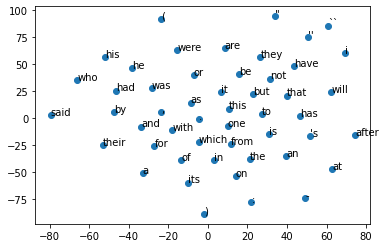

In [13]:
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

## Path 2 - via Word2Vec

In [14]:
# We can work with Glove or convert it to word2vec

# Path 2
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = 'data/word2vec.txt'

glove2word2vec(glove_input_file, word2vec_output_file)
print("INFO: file converted and saved to - " + word2vec_output_file)

INFO: file converted and saved to - data/word2vec.txt


In [15]:
from gensim.models import KeyedVectors

# load the Stanford GloVe model
filename = 'data/word2vec.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)


In [16]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523603677749634)]


In [17]:
# Vector operation on glove
print(find_closest_embeddings(
    embeddings_dict["woman"] - embeddings_dict["man"] + embeddings_dict["king"]
)[:5])

['king', 'queen', 'prince', 'elizabeth', 'daughter']
